In [11]:
!pip3 install scikit-learn
!pip3 install matplotlib

In [5]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
X,y=mnist.data, mnist.target

In [7]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
X.shape

(70000, 784)

In [9]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
y.shape

(70000,)

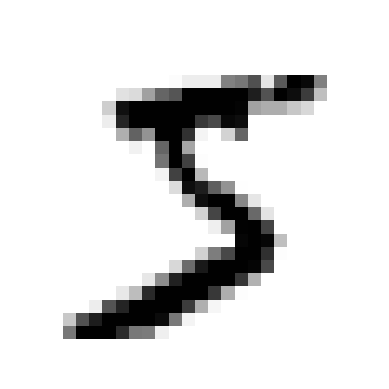

In [13]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image=image_data.reshape(28,28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

some_digit=X[0]
plot_digit(some_digit)
plt.show()

In [14]:
y[0]

'5'

In [18]:
X_train, X_test, y_train, y_test=X[:60000],X[60001:],y[:60000], y[60000:]

In [20]:
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

In [22]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

In [26]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [32]:
from sklearn.dummy import DummyClassifier
dummy_clf=DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [33]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')


array([0.90965, 0.90965, 0.90965])

In [36]:
#more controllable cross val function
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds=StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf=clone(sgd_clf)
  X_train_folds=X_train[train_index]
  y_train_folds=y_train_5[train_index]
  X_test_fold=X_train[test_index]
  y_test_fold=y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred=clone_clf.predict(X_test_fold)
  n_correct=sum(y_pred==y_test_fold)
  print(n_correct/len(y_pred))

0.95035
0.96035
0.9604


In [37]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [44]:
from sklearn.metrics import precision_score , recall_score, f1_score
print(precision_score(y_train_5, y_train_pred))

print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


In [46]:
f1_score(y_train_5, y_train_pred)


0.7325171197343846